# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Friso|secret |
|Stijn|secret |
|Jesse|secret |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
from rdflib import  Graph
import networkx as nx
import matplotlib.pyplot as plt
import rdflib
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
# Er is gebruik gemaakt van pydot dit is te installeren met een van de volgende command lines
# https://pypi.org/project/pydot/

# Voor anaconda
# conda install pydot

# Voor pip
# %pip install pydot

# Tutorial RDF plus RDFS conversie

In deze tutorial wordt en ondermeer gekeken naar de werking van RDF met RDFlid, hoe networkx grafen kunnen worden omgezet naar een rdfdatabase, sparql queries met rdf, hoe een rdf database kan worden omgezet naar een networkx graaf en netwerk statistieken. Na alle informatie kan er worden geoefend met een opdracht.

# Inhoud
* [Uitleg RDF & RDFlib](#rdfs)
    * [Het gebruik van RDF](#gebruikrdfs)
* [Networkx naar RDF plus RDFS](#networkxtordf)
    * [Networkx grafen](#networkx)
        * [Familiestamboom](#stamboom)
        * [Lhbtqi+](#lhbtqi+)
    * [Conversie code](#codenetworkxrdf)
    * [Output lezen](#outputlezen)
* [Sparql queries](#sparqlqueries)
    * [Familiestamboom queries](#)
    * [LHBTQI+ queries](#)
* [RDF plus RDFS naar networkx](#rdftonetworkx)
    * [Eigen code](#eigencode)
    * [RDF functie](#bestaandefunctie)
* [Netwerk statistieken](#netwerkstatistieken)
* [Opdracht](#opdracht)



<a id='rdfs'></a>
# Uitleg RDF & RDFlib


<a id='gebruikrdfs'></a>
## Het gebruik van RDF

RDF, in het Engels Resource Description Framework, is een database model dat gebruikt wordt voor het beschrijven en modelleren van informatie die is geïmplementeerd in bronnen van het web. RDF maakt het voorstellen en uitwisselen van informatie mogelijk door middel van driedelige subject-predicaat-object-structuur. Deze structuur heet een triple. Het subject is de bron die wordt beschreven. Met het predicaat kan worden aangegeven welk kenmerk of aspect van die bron wordt beschreven. Het object is de waarde die dit kenmerk heeft. Met triples kan dus worden verwezen naar een specifieke bron. 
Door middel van queries kunnen deze triples worden gebruik om specifieke informatie op te vragen.


<a id='networkxtordf'></a>

# Networkx naar RDF plus RDFS

## Inhoud van het hoofdstuk
* [Networkx grafen](#networkx)
    * [Familiestamboom](#stamboom)
    * [Lhbtqi+](#lhbtqi+)
* [Conversie code](#codenetworkxrdf)
* [Output lezen](#outputlezen)


In dit stuk van de tutorial zal er gekeken worden hoe een networkx graaf kan worden omgezet naar een RDF database door middel van de python bibliotheek rdflib. In deze tutorial zal er worden gekeken naar de volgende twee [networkx grafen](#networkx). De eerste graaf is een [familiestamboom](#stamboom) de tweede graaf is een graaf over het definiëren van de [lhbtqi+](#lhbtqi+) community. Na een uitleg over de graven wordt er gekeken naar de [conversie code](#codenetworkxrdf) om een networkx graaf om te zetten naar een RDF database.

<a id='networkx'></a>
# Networkx Grafen

De networkx graven hebben attributen toegewezen aan hun knopen (nodes) en aan hun relaties (edges). Deze attributen worden in de zelf gemaakte networkx2RDF functie omgezet tot RDF triples. Voor de knopen en de attributen van die knopen worden in deze tutorial aparte (lege) namespaces aangemaakt en aan de resources toegewezen. Hier wordt later in de tutorial verder op ingegaan.

<a id='stamboom'></a>
## Networkx Familiestamboom

Hieronder is de networkx graaf van een familiestamboom te zien. In de stamboom worden verschillende familieleden gepresenteerd en daar tussen de relatie "Ouder van". Elke edge tussen een node wil dus zeggen dat de eerste node ouder is van de daarnaar toegewezen node.

Elke node in de graaf is voorzien van het attribuut "geslacht" met de waarde "Man" of "Vrouw". Dit attribuut wordt tijdens het omzetten naar de RDF database omgezet tot rdf.type Man of Vrouw. Daarnaast hebben alle edges het attribuut "Ouder_van" deze relatie wordt in in de RDF database een predicaat binnen de, speciaal voor deze tutorial aangemaakte, namespace.

In [4]:
# Maak een leeg directed graph aan
ouder_g = nx.DiGraph()

# Lijst met alle kinderen
kids = [
    ['Friso', 'Nathan', 'Lucas'], 
    ['Brigitta', 'Mirjam', 'Johan'], # Ook ouders
    ['Nienke', 'Bente', 'Jasper', 'Wouter'], 
    ['Anne'], 
    ['Femmy', 'Pieter', 'Jack', 'Wim', 'Leo', 'JanH'], # Gedeeltelijk ook ouders
    ['Patrick', 'Renate', 'Bianca'], # Gedeeltelijk ook ouders
    ['Mirea', 'Sacha', 'Lynn'], 
    ['Sita', 'Desi'], 
    ['Gijs', 'Lisa'], 
    ['Mick'], 
    ['Lars', 'Sven'], 
    ['Marijn'], 
    ['Sander', 'Nathalie', 'Linda']
]

# Lijst met alle ouders, ouders[0] horen bij kids[0] etc.
ouders = [
    ['Pieter', 'Brigitta'], 
    ['Piet', 'Mien'], # Grootvader en moeder
    ['Jeanette', 'Johan'], 
    ['Ge', 'Mirjam'], 
    ['Geertruida', 'Theo'], # Grootvader en moeder/overgrootvader en moeder van Mick, Lars en Sven
    ['Jack', 'Margaret'], # Grootvader en moeder van Mick, Lars en Sven
    ['JanH', 'Tanja'], 
    ['Wim', 'Tamara'], 
    ['Femmy', 'JanV'], 
    ['Renate', 'Rick'], 
    ['Bianca', 'Thomas'], 
    ['Rolf', 'Sandrina'], 
    ['Henry', 'Renee']
]

# Maak de juiste ouderrelaties aan
for i in range(len(ouders)):
    ouder_g.add_edges_from({(x, y) for x in ouders[i] for y in kids[i]}, relatie="Ouder_van")

# De mannen en de vrouwen in dit netwerk
m = {'Friso', 'Nathan', 'Lucas', 'Pieter', 'Piet', 'Johan', 'Pieter', 'Jasper', 'Wouter', 'Ge', 'Theo', 'Jack', 'JanH', 'JanV', 'Wim', 'Leo', 'Patrick', 'Gijs', 'Rick', 'Thomas', 'Lars', 'Sven', 'Mick', 'Marijn', 'Sander', 'Rolf', 'Henry'}
v = {'Brigitta', 'Mien', 'Jeanette', 'Mirjam', 'Nienke', 'Bente', 'Anne', 'Geertruida', 'Margaret', 'Tanja', 'Femmy', 'Tamara', 'Renate', 'Bianca', 'Mirea', 'Sacha', 'Lynn', 'Sita', 'Desi', 'Lisa', 'Nathalie', 'Renee', 'Sandrina', 'Linda'}

# Nu even de attributen M en V goed zetten
for n in m:
    ouder_g.nodes[n]['Geslacht']= 'Man'
for n in v:
    ouder_g.nodes[n]['Geslacht']= "Vrouw"

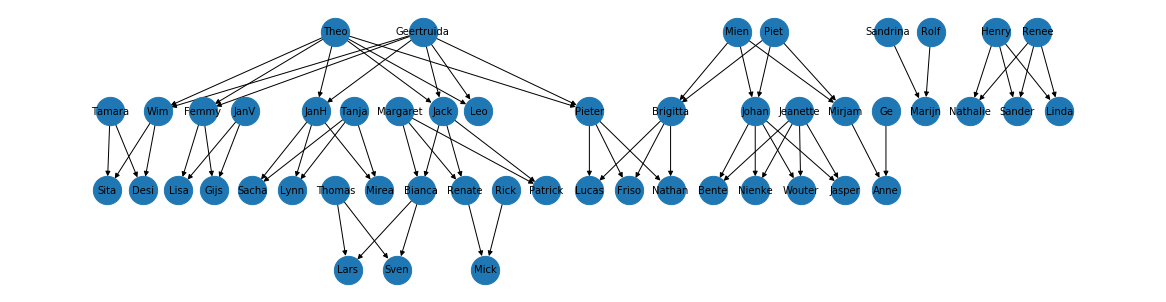

In [5]:
def plot_stamboom(graph):
    plt.figure(figsize=(16,4)) 
    pos = graphviz_layout(graph, prog="dot")
    nx.draw(graph, pos, with_labels=True, node_size=800, font_color="black", font_size=10)
    plt.show()

# Plot familie graaf als stamboom
plot_stamboom(ouder_g)

<a id='lhbtqi+'></a>
# Networkx LHBTQI+

Hieronder is de networkx graaf van waarin de LHBTQI+ community wordt gedefinieerd. Deze graaf bestaat uit nodes die een geaardheid representeren. De edges tussen de nodes geven aan welke node zich aangetrokken voelt tot welke node.

In deze graaf heeft elke node het attribuut "geslacht" met een waarde "Man", "Vrouw" of onzijdig. En het attribuut "Genderidentiteit" met de waardes "Voelt_zich_man", "Voelt_zich_vrouw", "Voelt_zich_non-binair". Deze attributen zijn gekozen omdat een persoon met een geaardheid een biologisch geslacht heeft maar zich wel anders kan voelen. De attributen van de nodes zullen later worden omgezet naar RDF.type. Daarnaast krijgt ook elke edge het attribuut "voelt_zich_aangetrokken_tot". Net als in de familiestamboom wordt deze relatie in de RDF database een predicaat binnen de, speciaal voor deze tutorial aangemaakte, namespace.

In [6]:
lhbtqi_g = nx.DiGraph()

# Maak nodes aan en geef ze hun gender voorkeur
nodes = {
    'Cis':{'Geslacht':'Man','Genderidentiteit':'Voelt_zich_man'}, # We hebben het cisgender persoon ook hetero gemaakt
    'Lesbisch':{'Geslacht':'Vrouw','Genderidentiteit':'Voelt_zich_vrouw'}, 
    'Homo':{'Geslacht':'Man','Genderidentiteit':'Voelt_zich_man'}, 
    'Bi':{'Geslacht':'Vrouw','Genderidentiteit':'Voelt_zich_vrouw'}, 
    'Trans':{'Geslacht':'Man','Genderidentiteit':'Voelt_zich_vrouw'}, # Trans persoon is ook hetero 
    'Asexueel':{'Geslacht':'Vrouw','Genderidentiteit':'Voelt_zich_vrouw'}, 
    'Intersexueel':{'Geslacht': 'Onzijdig', 'Genderidentiteit':'Voelt_zich_man'}, # Intersexueel persoon is ook homo
    'Pansexueel':{'Geslacht':'Vrouw','Genderidentiteit':'Voelt_zich_vrouw'}, 
    'Queer':{'Geslacht':'Vrouw','Genderidentiteit':'Voelt_zich_non-binair'}, 
    'Queer2':{'Geslacht':'Man','Genderidentiteit':'Voelt_zich_non-binair'}
}

lhbtqi_g.add_nodes_from(nodes)

# Geef de juiste voorkeur aan elke node
for n,attributes in nodes.items():
    for attribute,value in attributes.items():
        lhbtqi_g.nodes[n][attribute] = value


# Alle 'valt op' relaties lekker niet gehardcode
valt_op_vrouwen = ['Cis', 'Lesbisch', 'Bi', 'Pansexueel', 'Queer', 'Queer2']
valt_op_mannen = ['Bi', 'Homo', 'Trans', 'Intersexueel', 'Pansexueel', 'Queer', 'Queer2']
valt_op_overig = ['Queer', 'Queer2', 'Pansexueel']
orientatie = [(valt_op_vrouwen, 'Voelt_zich_vrouw'), (valt_op_mannen, 'Voelt_zich_man'), (valt_op_overig, 'Voelt_zich_non-binair')]

            
relaties = [(node, node2) for voorkeur,gevoel in orientatie for node in voorkeur for node2 in nodes
            if lhbtqi_g.nodes[node2]['Genderidentiteit'] == gevoel and node != node2]

lhbtqi_g.add_edges_from(relaties, relatie='Voelt_zich_aangetrokken_tot')

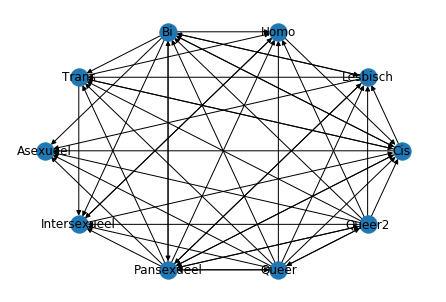

In [7]:
nx.draw_circular(lhbtqi_g, with_labels=True)

<a id='codenetworkxrdf'></a>
# Conversie code

De conversie code bestaat uit verschillende stappen. Eerst wordt een lege RDF graaf [aangemaakt](#aanmaken) en de daarbij behorende namespaces. We hebben de namespaces in deze tutorial <code>'rdflib_tutorial/'</code> voor personen en relaties en <code>'node_attributes/'</code> voor node attributen genoemd, maar deze namen kunnen dus zelf bepaald worden. Hierna worden alle [nodes](#nodes) uit de networkx graaf toegevoegd aan de RDF graaf met hun attributen als triples in het format: <code>(rdflib_tutorial/node, RDF.type, node_attributes/attribuut)</code>. Hierna worden alle edges omgezet naar [relaties](#relaties) in de rdf graaf in het format: <code>(rdflib_tutorial/node, rdflib_tutorial/relatie, rdflib_tutorial/node2)</code>. In de code is dit iets overzichtelijker aangezien de namespaces worden [afgekort](#opschonen).


<a id='aanmaken'></a>
## Creëeren van de graaf 

Een RDF graph kan worden aangemaakt met de functie <code>Graph()</code> deze maakt een lege graaf aan waar de verschillende triples later aan kunnen worden toegevoegd.

Nadat de graaf is aangemaakt kan er een bestaande namespace gebruikt worden of kan er een namespace gecreëerd, door middel van de rdflib functie <code>Namespace("URI")</code>. Een namespace is eigenlijk een domein waaraan elementen met attributen toegewezen kunnen worden. De naam van de elementen in de namespace volgen vaak de URI syntax zodat deze 'resources' makkelijk geïdentificeerd kunnen worden, maar dit is dus niet per se nodig om een namespace aan te maken.


<a id='nodes'></a>
## Toevoegen van de nodes

Nadat de basis van de graaf is aangemaakt kunnen er nodes worden toegevoegd aan de graaf. Elke node is een Resource en omdat elke node een Resource is heeft elke node ook zijn eigen desbetreffende 'namespace naam', vaak volgens URI syntax (zie [Creëeren van de graaf](#aanmaken)). In onze voorbeeld functie wordt tijdens het aanmaken van de resources de naam van de node gebruikt en wordt deze dus achter als het ware achter de namespace geplakt. Deze zullen door rdflib gezien worden als URIRef objecten, dus een reference (verwijzing) naar de URI.

Nadat elke node zijn eigen URIRef (URI reference) is kan elke node apart worden opgezocht en kunnen de eigenschappen van elke node worden toegevoegd. Eigenschappen worden toegekend door gebruik te maken van het predicaat "RDF.type". Dit predicaat houdt in dat resource (zogeheten subject) die er voorstaat de eigenschap heeft die er achterstaat (zogeheten object). Naast dat alle eigenschappen worden toegekend krijgt elke node ook een label. Dit wordt gedaan door gebruik te maken van het predicaat "RDFS.label" gevolgd door het label. Het label wordt toegevoegd als een Literal. Een Literal wordt gebruikt om een waarde te geven als dit een string, getal of datum is. In dit geval is het label de originele naam van de node (dus niet de URIRef) en is deze dus een string. Dit label zal later nog besproken worden.


<a id='relaties'></a>
## Toevoegen van relaties

Nadat elke node uit networkx is toegevoegd aan de rdf graaf en elke node ook de juiste eigenschappen heeft kunnen er relaties worden gelegd tussen de verschillende nodes. Een relatie wordt gemaakt door een triple te maken in de vorm subject, predicaat, object. Om de subject en de object te bepalen worden alle edges uit de networkx graaf opgegeven. Dit zijn tuples in de vorm (subject, object). Voor het predicaat wordt er gekeken naar de edge attribuut. Naast elk object en subject krijgt ook elk predicaat zijn eigen URI reference. Dit wordt gedaan door <code>"rt[predicate]"</code>. Dat is <code>"rdflib_tutorial/predicate"</code>, maar dan afgekort en predicate is dus de variabele edge attribuut. 


<a id='opschonen'></a>
## Opschonen

Nadat alle nodes en edges uit de networkx graaf zijn omgezet naar triples in de rdf graaf wordt de graaf nog wat opgeschoond.

Door namespaces te binden aan afkortingen zullen alleen de afkortingen worden weergegeven in de graaf. Als je dan de RDF graaf weergeeft zie je bijvoorbeeld <code>rt:Friso</code> in plaats van <code>rdflib_tutorial/Friso</code>. Dit zorgt er voor dat de graaf wat overzichtelijker wordt. In deze graaf wordt de naam van de namespace <code>"rdflib_tutorial/"</code> afgekort tot rt en <code>"node_attributes/"</code> zal afgekort worden tot attr, dit wordt gedaan door deze afkortingen te "binden" aan de RDF graph door middel van <code>g.bind("afkorting", Namespace)</code>. 

In [8]:
from rdflib import Literal, RDF
import rdflib
from rdflib.namespace import Namespace, RDFS

def networkx2RDF(G):
    
    # Creëer RDF graph
    g = Graph()
    
    # Creëer namespaces
    rt = Namespace("rdflib_tutorial/")
    attr = Namespace("node_attributes/")
    
    # Ken alle eigenschappen toe aan een node
    for node,attributes in G.nodes(data=True):
        subject = rt[node]
        for attribute,value in attributes.items():
            obj = attr[value]
            g.add((subject, RDF.type, obj))
        g.add((subject, RDFS.label, Literal(node)))
        
    # Creëer een relatie voor alle networkx edges
    for edge in G.edges(data=True):
        subject = rt[edge[0]]
        obj = rt[edge[1]]
        
        # Werkt ook voor meerdere relaties (attributen van edges)
        for relation in edge[2].values():
            predicate = relation
            g.add((subject, rt[predicate], obj))
            
    # Kort namespace URi af
    g.bind("rt", rt)
    g.bind("attr", attr)
    
    return g

<a id='outputlezen'></a>
# Output lezen

Om de uitput van een RDF graaf duidelijk te kunnen lezen kan er gebruik worden gemaakt van de functie <code>serialize(format)</code> deze functie maakt het mogelijk om de ouput in verschillende formats te printen. Een veel gebruikte format voor het printen van RDF graven is de format 'ttl' (turtle). Dit format zet elke node onder elkaar en geeft onder elke node de eigenschappen van die node en de relaties van die node. Zie ook de output hieronder, gebruik het dropdown menu om te wisselen tussen de RDF graaf van de familiestamboom en de RDF lhbtqi+ graaf.

In [9]:
def turtle_printer(Graph):
    # Print rdf graph in turtle format
    print(Graph.serialize(format='ttl').decode('u8'))

# Familie en lhbtqi netwerk uit netwerkx als rdf graph
rdf_graph = networkx2RDF(ouder_g)
lhbtqi_graph = networkx2RDF(lhbtqi_g)

interact(turtle_printer, Graph=[("Familie graph", rdf_graph), ("LHBTQI+ graph", lhbtqi_graph)])

interactive(children=(Dropdown(description='Graph', options=(('Familie graph', <Graph identifier=Nd76fed6efe46…

<function __main__.turtle_printer(Graph)>

<a id='sparqlqueries'></a>
# RDFLIB & Sparql queries

In dit hoofdstuk wordt beschreven hoe je doormiddel van Sparql queries een RDF database kan bevragen. Je kan nodes selecteren die voldoen aan verschillende criteria. In deze tutorial zijn er queries gemaakt voor zowel de [familiestamboom](#familiequeries) als voor de [LHBTQI+ community](#lhbtqi+queries)

Een sparql query kan worden aangemaakt met de functie <code>graph.query(query)</code>.
In deze functie kan de query dan als (multi-line)string geschreven worden. Een query begint met het SELECT statement gevolgd door de objecten die moeten worden geselecteerd. Deze objecten en de eisen waaraan de objecten moeten voldoen definieer je in het WHERE statement. In het WHERE statement kunnen de criteria worden gegeven in de vorm van triples (?object, predikaat, ?subject). In het voorbeeld van de query voor vader worden verschillende criteria gegeven. Als eerste <code>?o rt:ouder_van ?s</code>. Deze statement wil zeggen dat een object <code>?o</code> ouder moet zijn van een object <code>?s</code>, daarnaast moet het object <code>?o</code> het <code>rdf:type attr:Man</code> hebben, dus een man zijn, en hij moet een <code>rdfs:label</code> hebben dat wordt opgeslagen in het object <code>?naamvader</code>. Daarnaast moet het object <code>?s</code> een <code>rdfs:label</code> hebben dat wordt opgeslagen in het object <code>?naamkind</code>. Deze objecten <code>?naamvader</code> en <code>?naamkind</code> zijn dus de namen van de nodes uit het netwerk, opgeslagen als Literal.

<a id='familiequeries'></a>

# Familiestamboom queries

In [10]:
Kinderen = rdf_graph.query(
"""
SELECT ?naamkind ?naamouder 
WHERE 
{
    ?ouder rt:Ouder_van ?kind ; 
           rdfs:label ?naamouder.
    ?kind rdfs:label ?naamkind.
}
"""
)

Vaders = rdf_graph.query(
"""
SELECT ?naamvader ?naamkind 
WHERE 
{
    ?o rt:Ouder_van ?s ;
       rdf:type attr:Man ;
       rdfs:label ?naamvader .
    ?s rdfs:label ?naamkind .
}
"""
)

Moeders = rdf_graph.query(
"""
SELECT ?naammoeder ?naamkind 
WHERE 
{
    ?o rt:Ouder_van ?s ;
       rdf:type attr:Vrouw ;
       rdfs:label ?naammoeder .
    ?s rdfs:label ?naamkind .
}
"""
)    

Zoons = rdf_graph.query(   
"""
SELECT ?naamzoon ?naamouder  
WHERE 
{
    ?o rt:Ouder_van ?s ;
       rdfs:label ?naamouder .
    ?s rdf:type attr:Man ;
       rdfs:label ?naamzoon .
}
"""
)

Dochters = rdf_graph.query(
"""
SELECT ?naamdochter ?naamouder  
WHERE 
{
    ?o rt:Ouder_van ?s ;
       rdfs:label ?naamouder .
    ?s rdf:type attr:Vrouw;
       rdfs:label ?naamdochter .
}
"""
)

Broers = rdf_graph.query(
"""
SELECT DISTINCT ?naam2 ?naam
WHERE 
{
    ?o rt:Ouder_van ?kind.
    ?o rt:Ouder_van ?kind2.
    ?kind2 rdf:type attr:Man ;
           rdfs:label ?naam2 .
    ?kind rdfs:label ?naam .
    
    FILTER (?kind != ?kind2)
}
"""
)

Zussen = rdf_graph.query( 
"""
SELECT DISTINCT ?naam2 ?naam
WHERE 
{
    ?o rt:Ouder_van ?kind.
    ?o rt:Ouder_van ?kind2.
    ?kind2 rdf:type attr:Vrouw;
           rdfs:label ?naam2 .
    ?kind rdfs:label ?naam .
    
    FILTER (?kind != ?kind2)
}
"""
)

Opas = rdf_graph.query(
"""
SELECT DISTINCT ?naamopa ?naamkind
WHERE 
{
    ?o rt:Ouder_van ?z .
    ?z rt:Ouder_van ?s .
    ?o  rdf:type attr:Man ; 
        rdfs:label ?naamopa .
    ?s  rdfs:label ?naamkind .
}
"""
)

Omas = rdf_graph.query(
"""
SELECT DISTINCT ?naamoma ?naamkind
WHERE 
{
    ?o rt:Ouder_van ?z .
    ?z rt:Ouder_van ?s .
    ?o  rdf:type attr:Vrouw ;
        rdfs:label ?naamoma .
    ?s  rdfs:label ?naamkind .
}
"""
)

Ooms = rdf_graph.query(
"""
SELECT DISTINCT ?naamoom ?naamkind
WHERE 
{
    ?o rt:Ouder_van ?oom . 
    ?o rt:Ouder_van ?oom2 .
    ?oom rt:Ouder_van ?s .
    ?oom2 rdf:type attr:Man ; 
          rdfs:label ?naamoom .
    ?s rdfs:label ?naamkind .
    FILTER((?oom)!=(?oom2))
}
"""
)

Tantes = rdf_graph.query(
"""
SELECT DISTINCT ?naamtante ?naamkind
WHERE 
{
    ?o rt:Ouder_van ?tante . 
    ?o rt:Ouder_van ?tante2 .
    ?tante rt:Ouder_van ?s .
    ?tante2 rdf:type attr:Vrouw ;
            rdfs:label ?naamtante .
    ?s rdfs:label ?naamkind .
    FILTER((?tante)!=(?tante2))
}
"""
)

Neven = rdf_graph.query(
"""
SELECT DISTINCT ?naam1 ?naam2 
WHERE 
{
    ?neef1 rdf:type attr:Man ;
           rdfs:label ?naam1 .
    ?o rt:Ouder_van ?neef1 .
    ?o2 rt:Ouder_van ?neef2 .
    ?neef2 rdfs:label ?naam2 .
    {
        ?o rdf:type attr:Man.
        ?ouder rt:Ouder_van ?o ;
               rt:Ouder_van ?o2 .
        FILTER(?o != ?o2) .
    }
    UNION
    {
        ?o rdf:type attr:Vrouw.
        ?ouder rt:Ouder_van ?o ;
               rt:Ouder_van ?o2 .
        FILTER(?o != ?o2) .
    }
}
"""
)

Nichten = rdf_graph.query(
"""
SELECT DISTINCT ?naam1 ?naam2 
WHERE 
{
    ?nicht1 rdf:type attr:Vrouw ;
            rdfs:label ?naam1 .
    ?o rt:Ouder_van ?nicht1 .
    ?o2 rt:Ouder_van ?nicht2 .
    ?nicht2 rdfs:label ?naam2 .
    
    {
        ?o rdf:type attr:Man .
        ?ouder rt:Ouder_van ?o ;
               rt:Ouder_van ?o2 .
        FILTER(?o != ?o2) .
    }
    UNION
    {
        ?o rdf:type attr:Vrouw.
        ?ouder rt:Ouder_van ?o ;
               rt:Ouder_van ?o2 .
        FILTER(?o != ?o2) .
    }
}
"""
)

Kleinzoons = rdf_graph.query(
"""
SELECT ?naamk ?naamg 
WHERE 
{
    ?grootouder rt:Ouder_van ?s ;
                rdfs:label ?naamg .
    ?s rt:Ouder_van ?kleinzoon .
    ?kleinzoon rdf:type attr:Man ;
               rdfs:label ?naamk .
}
""")

Kleindochters = rdf_graph.query(
"""
SELECT ?naamk ?naamg 
WHERE 
{
    ?grootouder rt:Ouder_van ?ouder ;
                rdfs:label ?naamg .
    ?ouder rt:Ouder_van ?kleindochter .
    ?kleindochter rdf:type attr:Vrouw ;
                  rdfs:label ?naamk .
}
""")
def relatie_printer(Relatie):
    
    # Relatie placeholder (x is placeholder van y)
    placeholder = Relatie[0]
    
    # Resultaat uit query van de relatie
    relatie = Relatie[1]
    
    # Print alle triples uit de query in overzichtelijk format
    for row in relatie:
        print(f"{row[0]} is {placeholder} van {row[1]}")

# Maak dropdown menu van alle familierelaties
interact(relatie_printer, Relatie=[('Kinderen', ('kind', Kinderen)), ('Vaders', ('vader', Vaders)), ('Moeders', ('moeder', Moeders)), ('Zoons', ('zoon', Zoons)), ('Dochters', ('dochter', Dochters)), ('Broers', ('broer', Broers)), ('Zussen', ('zus', Zussen)), ('Opas', ('opa', Opas)), ('Omas', ('oma', Omas)), ('Ooms', ('oom', Ooms)), ('Tantes', ('tante', Tantes)), ('Neven', ('neef', Neven)), ('Nichten', ('nicht', Nichten)), ('Kleinzoons', ('kleinzoon', Kleinzoons)), ('Kleindochters', ('kleindochter', Kleindochters))])


interactive(children=(Dropdown(description='Relatie', options=(('Kinderen', ('kind', <rdflib.plugins.sparql.pr…

<function __main__.relatie_printer(Relatie)>

<a id='lhbtqi+queries'></a>

# LHBTQI+ queries

In [11]:
Cisgenders = lhbtqi_graph.query(
"""
SELECT ?naam  
WHERE 
{
    {
    ?cis rdf:type attr:Man ;
         rdf:type attr:Voelt_zich_man ;
         rdfs:label ?naam.
    }
    UNION
    {
    ?cis rdf:type attr:Vrouw ;
         rdf:type attr:Voelt_zich_vrouw ;
         rdfs:label ?naam.
    }
}
""")

Lesbiennes = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?les rdf:type attr:Voelt_zich_vrouw .
    ?vrouw rdf:type attr:Voelt_zich_vrouw .
    ?man rdf:type attr:Voelt_zich_man .
    ?les rt:Voelt_zich_aangetrokken_tot ?vrouw ;
         rdfs:label ?naam.
    FILTER NOT EXISTS { ?les rt:Voelt_zich_aangetrokken_tot ?man}
}
""")

Homos = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?homo rdf:type attr:Voelt_zich_man ;
          rt:Voelt_zich_aangetrokken_tot ?man ;
          rdfs:label ?naam.
    ?man rdf:type attr:Voelt_zich_man .
    ?vrouw rdf:type attr:Voelt_zich_vrouw .
    FILTER NOT EXISTS { ?homo rt:Voelt_zich_aangetrokken_tot ?vrouw}
}
""")

Bisexuelen = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?bi rt:Voelt_zich_aangetrokken_tot ?man ;
        rt:Voelt_zich_aangetrokken_tot ?vrouw ;
        rdfs:label ?naam.

    ?man rdf:type attr:Voelt_zich_man .
    ?vrouw rdf:type attr:Voelt_zich_vrouw .
    
    FILTER NOT EXISTS 
    { 
        ?non_binair rdf:type attr:Voelt_zich_non-binair.
        ?bi rt:Voelt_zich_aangetrokken_tot ?non_binair .
    } .
}
""")

Transgenders = lhbtqi_graph.query(
"""
SELECT ?naam  
WHERE 
{
    {
    ?cis rdf:type attr:Man ;
         rdf:type attr:Voelt_zich_vrouw ;
         rdfs:label ?naam.
    }
    UNION
    {
    ?cis rdf:type attr:Vrouw ;
         rdf:type attr:Voelt_zich_man ;
         rdfs:label ?naam.
    }
}
""")

Asexuelen = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?asex rdfs:label ?naam .
    MINUS { ?asex rt:Voelt_zich_aangetrokken_tot ?persoon }
}
""")

Intersexueel = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?inter rdfs:label ?naam ;
           rdf:type attr:Onzijdig .
    
}
""")

Pansexuelen = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?pan rt:Voelt_zich_aangetrokken_tot ?man ,
                                        ?vrouw ,
                                        ?non_binair ;
         rdfs:label ?naam .
    ?man rdf:type attr:Voelt_zich_man .
    ?vrouw rdf:type attr:Voelt_zich_vrouw .
    ?non_binair rdf:type attr:Voelt_zich_non-binair .
}
""")

Queer = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{
    ?queer rt:Voelt_zich_aangetrokken_tot ?man ,
                                        ?vrouw ,
                                        ?non_binair ;
           rdfs:label ?naam ;
           rdf:type attr:Voelt_zich_non-binair .
    ?man rdf:type attr:Voelt_zich_man .
    ?vrouw rdf:type attr:Voelt_zich_vrouw .
    ?non_binair rdf:type attr:Voelt_zich_non-binair .
}
""")

Heteros = lhbtqi_graph.query(
"""
SELECT DISTINCT ?naam  
WHERE 
{

    {
        ?hetero rdf:type attr:Voelt_zich_man ;
                rt:Voelt_zich_aangetrokken_tot ?vrouw ;
                rdfs:label ?naam .
        ?man a attr:Voelt_zich_man .
        ?vrouw a attr:Voelt_zich_vrouw .
        FILTER(?hetero != ?man)
        MINUS { ?hetero rt:Voelt_zich_aangetrokken_tot ?man } .
    }
    UNION
    {
        ?hetero rdf:type attr:Voelt_zich_vrouw ;
                rt:Voelt_zich_aangetrokken_tot ?man ;
                rdfs:label ?naam .
        ?man a attr:Voelt_zich_man .
        ?vrouw a attr:Voelt_zich_vrouw .
        FILTER(?hetero != ?vrouw)
        MINUS { ?hetero rt:Voelt_zich_aangetrokken_tot ?vrouw } .
    }
}
""")

Plus = lhbtqi_graph.query(
"""
SELECT ?naam  
WHERE 
{
    ?plus rdfs:label ?naam
    MINUS 
    {
       # Om plus te definieren zou je alle bovenstaande queries moeten uitvoeren en in zulke minus blokken zetten.
       # Omdat dit heel onoverzichtelijk is hebben we ervoor gekozen dit niet te doen.
       # In deze graph is er geen 'Plus' persoon dus doen we het maar met deze contradictie
       ?plus rdfs:label ?naam
    }
}
""")

def lhbtqi_relatie_printer(Personen):
    # Als er geen personen zijn die zich als dit 'label' identificeren
    if not Personen:
        print("")
    
    # Print alle personen die zich als dit identificeren
    for row in Personen:
        print(f"{row[0]}")

# Maak een dropdown van alle opties
interact(lhbtqi_relatie_printer, Personen=[("Cisgenders", Cisgenders), ("Lesbiennes", Lesbiennes), ("Homosexuelen", Homos), ("Bisexuelen", Bisexuelen), ("Transgenders", Transgenders), ("Asexuelen", Asexuelen), ("Intersexuelen", Intersexueel), ("Pansexuelen", Pansexuelen), ("Queer", Queer), ("Plus", Plus)])

interactive(children=(Dropdown(description='Personen', options=(('Cisgenders', <rdflib.plugins.sparql.processo…

<function __main__.lhbtqi_relatie_printer(Personen)>

<a id='rdftonetworkx'></a>

# RDF plus RDFS naar networkx

Een RDF database kan worden omgezet naar een networkx graaf. Dit kan op verschillende manier gedaan worden. In deze tutorial is er gebruik gemaakt van een [zelfgemaakte functie](#eigencode) en een al [bestaande functie](#bestaandefunctie).


<a id='eigencode'></a>
# Uitleg geschreven functie

De hieronder staande functie maakt het mogelijk om een rdf database om te zetten naar een networkx graaf. Deze functie is specifiek geschreven om als output een graaf te krijgen die isomorf is aan de [graaf](#networkx) die door de eerder gemaakte networkx2RDF functie networkx gaat. 

Als eerste wordt er een lege directed networkx graaf aangemaakt. Dit wordt gedaan met de functie <code>nx.DiGraph()</code>. Na dat de graaf is aangemaakt kunnen de nodes en de edges worden toegevoed. Een rdf database bestaat uit triples. Elke triple is in de vorm (subject, predicate, object). In de functie wordt per triple de subject, predicate en de object gedefinieerd. Daarna wordt er aan de hand van het type predicaat gekeken of de triple in het networkx model een edge of een node met een attribuut voorstelt. Wanneer het predicaat "type" bevat wil dit zeggen dat het object een eigenschap is van de subject. In een networkx kan een eigenschap van een subject worden aangegeven door een node (subject) een attribuut te geven (object). Als het predicaat "rdflib_tutorial" bevat wil dit in dit geval zeggen dat deze tripel een relatie (edge) aanduidt. Dit weten we omdat de namespace "rdflib_tutorial" aangemaakt in de [coversie code](#codenetworkxrdf) een URI is voor een relatie of node en aangezien het de predicaat van de tripel checkt is het in dit geval een relatie. De subject heeft dan dus een relatie met het object. Het soort relatie wordt in dit geval aangegeven door de predicaat. In networkx kan dit worden gemaakt door een edge toe te voegen aan de graaf met de vorm (subject, object, predicaat). Er wordt een edge gemaakt van een node (subject) naar een andere node (object) met een edge attribuut die de relatie aangeeft (predicaat).


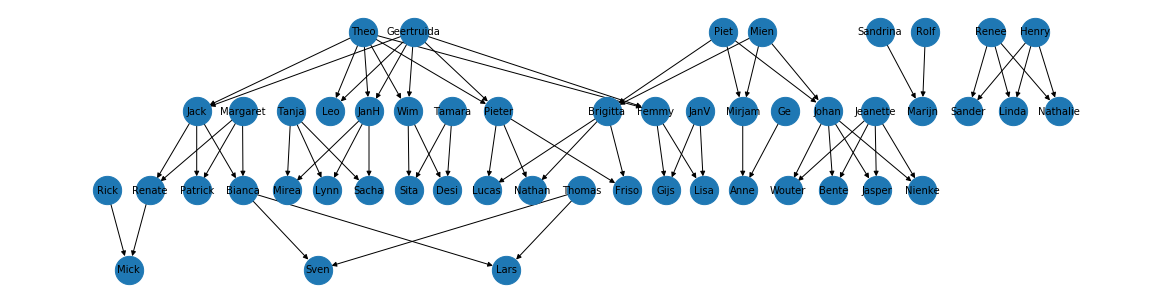

In [12]:
def rdf_graph_to_networkx_digraph(G):
    
    # Maak een leeg directed graph aan
    nx_G = nx.DiGraph()
    
    '''
    Defineer voor elke triple de subject, predicate en de object. 
    Strip deze van hun URI. Als het predicaat "type" bevat dan voeg de object van de triple toe als atribuut van de node. 
    Als het predicaat "rdflib_tutorial" bevat dan voeg een edge toe aan het netwerk met de tuple (subject, object) 
    met het predicaat als edge attribuut.
    '''
    for trip in G:
        subj = trip[0].split("/")[-1]
        obj = trip[2].split("/")[-1]
        pred = trip[1].split("/")[-1]
        if "type" in trip[1]:
            nx_G.add_node(subj, type=obj)
        if "rdflib_tutorial" in trip[1]:
            nx_G.add_edge(subj, obj, relatie=pred)
    return nx_G

# De aangemaakte rdf databases weer omgezet naar networkx
ouder_g_nieuw = rdf_graph_to_networkx_digraph(rdf_graph)
lhbtqi_g_nieuw = rdf_graph_to_networkx_digraph(lhbtqi_graph)

# Plot de nieuwe familie graaf
plot_stamboom(ouder_g_nieuw)

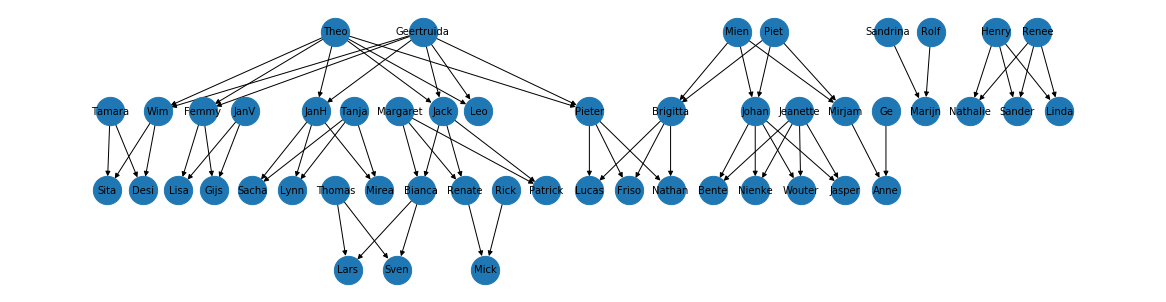

In [13]:
# Plot de originele familie graaf
plot_stamboom(ouder_g)

In [14]:
# Voor zowel de familie graaf als de lhbtqi graaf zijn twee nieuwe grafen isomorf 
print("Isomorf:")
print(nx.is_isomorphic(ouder_g, ouder_g_nieuw))
print(nx.is_isomorphic(lhbtqi_g, lhbtqi_g_nieuw), '')

# De nodes, edges en edge attributes zijn ook hetzelfde
print("\nNodes, edges en edge attributen hetzelfde:")
print(sorted(ouder_g.nodes) == sorted(ouder_g_nieuw.nodes))
print(sorted(lhbtqi_g.nodes) == sorted(lhbtqi_g_nieuw.nodes))
print(sorted(ouder_g.edges(data=True)) == sorted(ouder_g_nieuw.edges(data=True)))
print(sorted(lhbtqi_g.edges(data=True)) == sorted(lhbtqi_g_nieuw.edges(data=True)), '\n')

# Alleen heten de node attributes nu type in de nieuwe graaf (zie hieronder geslacht is nu type)
print(f"Oude graaf: {sorted(ouder_g.nodes(data=True))[:3]} \nNieuwe graaf: {sorted(ouder_g_nieuw.nodes(data=True))[:3]}")

Isomorf:
True
True 

Nodes, edges en edge attributen hetzelfde:
True
True
True
True 

Oude graaf: [('Anne', {'Geslacht': 'Vrouw'}), ('Bente', {'Geslacht': 'Vrouw'}), ('Bianca', {'Geslacht': 'Vrouw'})] 
Nieuwe graaf: [('Anne', {'type': 'Vrouw'}), ('Bente', {'type': 'Vrouw'}), ('Bianca', {'type': 'Vrouw'})]


<a id='bestaandefunctie'></a>
# Uitleg RDF functie

Naast de geschreven fucntie is er door rdflib ook een algemene functie gemaakt. Deze functie neemt als input een RDF database en geeft als output een networkx graaf. Echter houdt deze functie geen rekening met eventuele node attributen. In plaats van dat er attributen aan een node wordt toegevoegd wordt er een extra node gemaakt en een edge tussen de subject node en de object node. Doordat deze functie op deze manier werkt geeft het wel een actuele representatie van hoe de verschillende URI's met elkaar linken en hoe de RDF database er in een graaf uit zou zien. Echter zal bij het gebruik van deze functie een networkx model dat aan het begin gemaakt wordt, dan wordt omgezet tot rdf database en daarna weer terug wordt omgezet tot networkx graaf, niet isomorf zijn aan de originele graaf. 

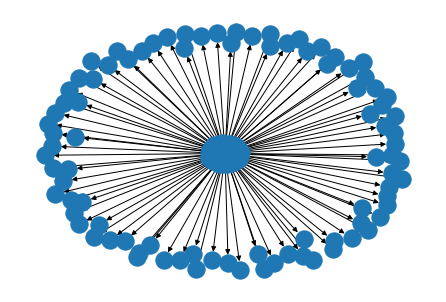

In [15]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph

# Haal de RDF database van Hugo de Jonge op
g=Graph()
g.parse('http://dbpedia.org/resource/Hugo_de_Jonge')

# Zet de RDf database om tot networkx graaf
d = rdflib_to_networkx_digraph(g)
nx.draw(d)

<a id='netwerkstatistieken'></a>
# Netwerk statistieken

Door een RDF database om te zetten naar een networkx graaf kan er worden gekeken naar de verschillende statistieken. Dit kan nuttig zijn om meer informatie te krijgen over de structuur van de RDF database. Er kan bijvoorbeeld onder andere worden gekeken naar hoeveel verschillende URI's er zijn in een rdf database. Dit kan worden gedaan door het aantal nodes te tellen. Daarnaast kan er worden gekeken hoeveel tuples er zijn aangemaakt door de edges te tellen. Ook kan er per URI worden gekeken in hoeveel triples deze voorkomt. Dit kan worden gedaan door te kijken naar de degree van elke node. Een node met een hoge degree komt vaak voor in triples en zal dus ook een van de belangrijkste dingen zijn in de RDF database. In het geval van de database van Hugo de Jonge heeft Hugo de Jonge de hoogste degree. Dit is dan ook logisch omdat het een database is over Hugo de Jonge zelf.

Formaat van het netwerk:
Het netwerk heeft 139 edges en 128 nodes

Het netwerk heeft een dichtheid van 0.01 

De gemiddelde betweenness-centrality is 0.0018498664229471315 met een standaarddeviatie van 12.281545835530485
De node met de hoogste betweenness-centrality is Hugo Mattheüs (Hugo) de Jonge (Bruinisse, 26 september 1977) is een Nederlands politicus van het Christen-Democratisch Appèl (CDA). Hij is sinds 2017 vicepremier en minister van Volksgezondheid, Welzijn en Sport.
De node met de laagste betweenness-centrality is 2017-10-26 

De degrees van elke node:


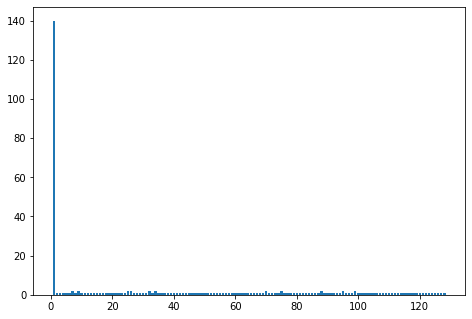

In [16]:
import statistics

def measures(G):
    Nodes = [(node+1) for node in range(len(G.degree()))]
    Degrees = [degree[1] for degree in G.degree()]
    print("Formaat van het netwerk:")
    print("Het netwerk heeft", len(G.edges()), "edges en", len(G.nodes()), "nodes\n")
    print("Het netwerk heeft een dichtheid van", round(nx.density(G), 2),"\n")
    print("De gemiddelde betweenness-centrality is",sum(nx.betweenness_centrality(G).values())/len(nx.betweenness_centrality(G))
         ,"met een standaarddeviatie van", statistics.stdev(Degrees))
    print("De node met de hoogste betweenness-centrality is",max(nx.betweenness_centrality(G), key=lambda x: x[1]))
    print("De node met de laagste betweenness-centrality is",min(nx.betweenness_centrality(G), key=lambda x: x[1]),"\n")
    print("De degrees van elke node:")
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(Nodes,Degrees)
    plt.show()

measures(d)    

<a id='opdracht'></a>
# Opdracht


Nu is de opdracht aan jou om een gegeven networkx graaf om te vormen naar een RDF database. Deze RDF database zal vervolgens worden getest op juistheid door middel van de functie [rdf_graph_to_networkx_digraph](#eigencode) die eerder in deze tutorial is gegeven. 


Hint: wanneer je er niet uitkomt kun je gebruik maken van de functie [networkx2RDF](#codenetworkxrdf)

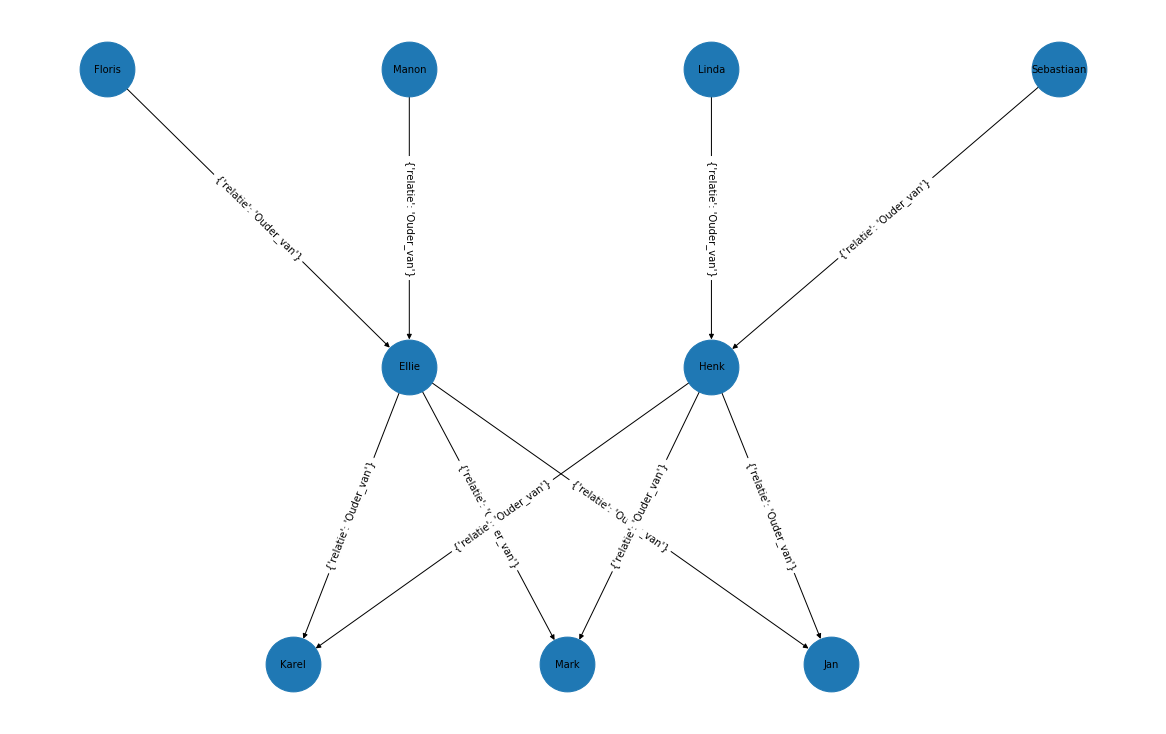

In [17]:
# Deze graaf moet worden omgevormd naar een RDF database
graaf = nx.DiGraph()

# Lijst met alle kinderen
kinderen = [
    ['Jan', 'Mark', 'Karel'], 
    ['Henk'], # Ook ouder
    ['Ellie'] # Ook ouder
]

# Lijst met alle ouders, ouders[0] horen bij kids[0] etc.
ouders = [
    ['Henk', 'Ellie'], 
    ['Sebastiaan', 'Linda'], # Ouders & grootouders
    ['Floris', 'Manon'] # Ouders & grootouders
]

# Maak de juiste ouderrelaties aan met attribuut
for i in range(len(ouders)):
    graaf.add_edges_from({(x, y) for x in ouders[i] for y in kinderen[i]}, relatie="Ouder_van")
    
# De mannen en de vrouwen in dit netwerk
m = {'Jan','Mark','Karel','Henk','Sebastiaan', 'Floris'}
v = {'Ellie','Linda','Manon'}

# Nu even de attributen M en V goed zetten
for n in m:
    graaf.nodes[n]['Geslacht']= 'Man'
for n in v:
    graaf.nodes[n]['Geslacht']= "Vrouw"

# Print nodes
plt.figure(figsize=(16,10)) 
pos = graphviz_layout(graaf, prog="dot")
nx.draw(graaf, pos, with_labels=True, node_size=3000, font_color="black", font_size=10)

# Print edge labels
edge_labels = nx.get_edge_attributes(graaf,'type')
nx.draw_networkx_edge_labels(graaf, pos, labels = edge_labels)

plt.show()

In [18]:
from rdflib import Literal, RDF
import rdflib
from rdflib.namespace import Namespace, RDFS

# Definieer hier de gemaakte RDF database

# Creëer RDF graph
g = Graph()
    
# Creëer namespaces
rt = Namespace("rdflib_tutorial/") # Namespace voor de relatie
attr = Namespace("node_attributes/")
    
# Jouw code hier
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# Even testen of het gelukt is

T = rdf_graph_to_networkx_digraph(rdf_graphT)
plt.figure(figsize=(16,4)) 
pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos, with_labels=True, node_size=800, font_color="black", font_size=10)
plt.show()

nx.is_isomorphic(graaf, T)